In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
data = pd.read_csv('Cellphone.csv')

In [28]:
print(data.head())
data.describe()

   Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0         203   2357    10   135.0          5.2  424         8      1.35   
1         880   1749    10   125.0          4.0  233         2      1.30   
2          40   1916    10   110.0          4.7  312         4      1.20   
3          99   1315    11   118.5          4.0  233         2      1.30   
4         880   1749    11   125.0          4.0  233         2      1.30   

   internal mem    ram  RearCam  Front_Cam  battery  thickness  
0          16.0  3.000    13.00        8.0     2610        7.4  
1           4.0  1.000     3.15        0.0     1700        9.9  
2           8.0  1.500    13.00        5.0     2000        7.6  
3           4.0  0.512     3.15        0.0     1400       11.0  
4           4.0  1.000     3.15        0.0     1700        9.9  


,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [31]:
#data.drop(columns=[ 'internal mem', 'ppi'], inplace=True)  
data.dropna(inplace=True) 
X = data[['cpu core', 'cpu freq', 'ram']]
y = data['Price']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')


MAE: 187.83
MSE: 55388.01
RMSE: 235.35
R² Score: 0.90


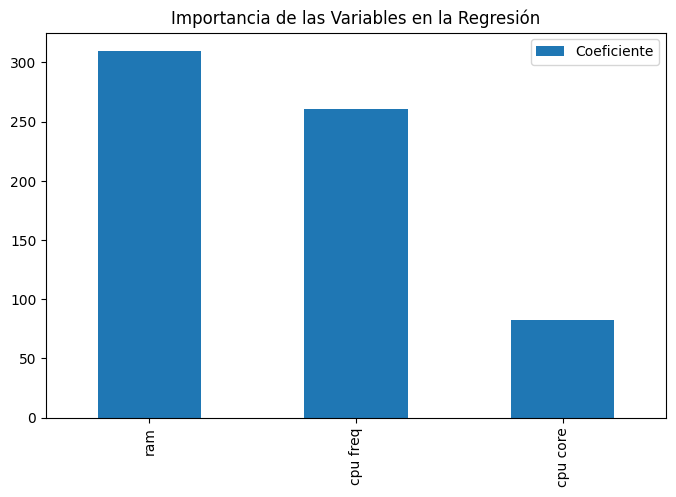

In [34]:
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
coef_df.sort_values(by='Coeficiente', ascending=False).plot(kind='bar', figsize=(8,5))
plt.title("Importancia de las Variables en la Regresión")
plt.show()


Peso final: [242.44993392911357, 78.92356321787963, 129.81807450290026], Sesgo final: 48.2617


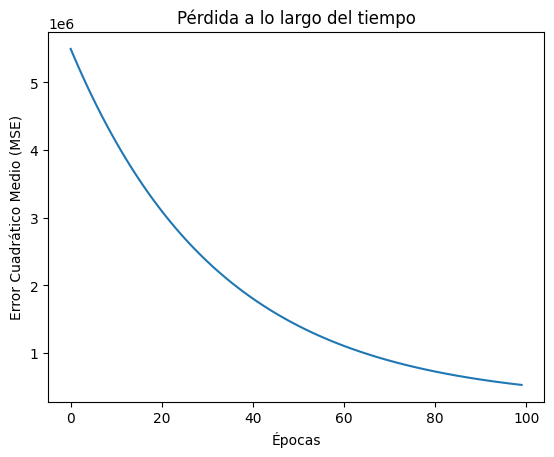

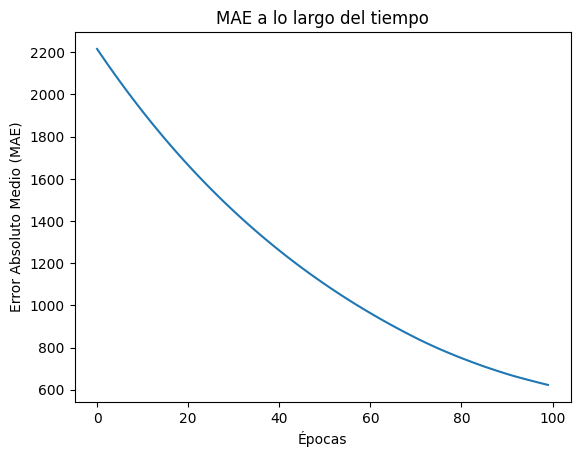

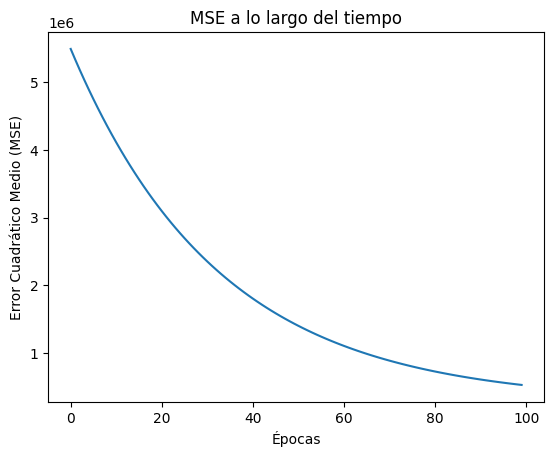

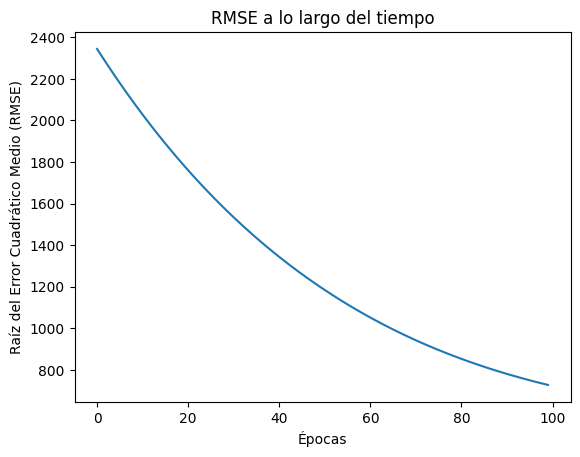

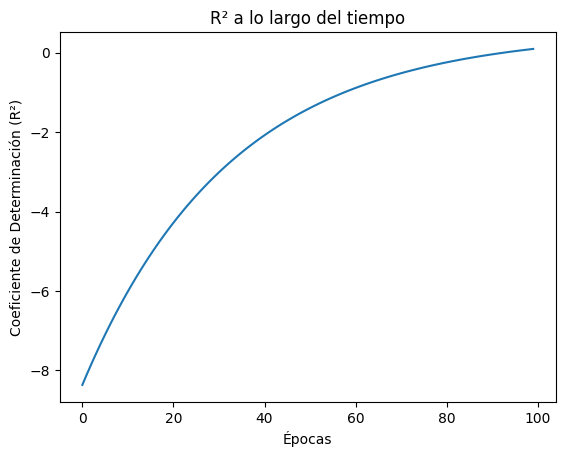

No se puede graficar la línea de regresión porque X es multidimensional
MAE Final: 622.9867


In [ ]:

X = data[['cpu core', 'cpu freq', 'ram']]
y = data['Price']


X = X.to_numpy()
y = y.to_numpy()


w = np.zeros(X.shape[1]) 
b = 0
learning_rate = 0.0002
epochs = 100
n = len(X)

loss_history = []
mae_history = []
mse_history = []
rmse_history = []
r2_history = []

for epoch in range(epochs):
    Y_pred = np.dot(X, w) + b

    loss = np.mean((y - Y_pred) ** 2)
    loss_history.append(loss)

    mae = mean_absolute_error(y, Y_pred)
    mae_history.append(mae)

    mse = mean_squared_error(y, Y_pred)
    mse_history.append(mse)

    rmse = np.sqrt(mse)
    rmse_history.append(rmse)

    r2 = r2_score(y, Y_pred)
    r2_history.append(r2)

    dw = -(2/n) * np.dot(X.T, (y - Y_pred)) 
    db = -(2/n) * np.sum(y - Y_pred)

    w -= learning_rate * dw
    b -= learning_rate * db


print(f"Peso final: {w.tolist()}, Sesgo final: {b:.4f}")


plt.figure()
plt.plot(loss_history)
plt.xlabel('Épocas')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Pérdida a lo largo del tiempo')
plt.show()

plt.figure()
plt.plot(mae_history)
plt.xlabel('Épocas')
plt.ylabel('Error Absoluto Medio (MAE)')
plt.title('MAE a lo largo del tiempo')
plt.show()

plt.figure()
plt.plot(mse_history)
plt.xlabel('Épocas')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('MSE a lo largo del tiempo')
plt.show()

plt.figure()
plt.plot(rmse_history)
plt.xlabel('Épocas')
plt.ylabel('Raíz del Error Cuadrático Medio (RMSE)')
plt.title('RMSE a lo largo del tiempo')
plt.show()

plt.figure()
plt.plot(r2_history)
plt.xlabel('Épocas')
plt.ylabel('Coeficiente de Determinación (R²)')
plt.title('R² a lo largo del tiempo')
plt.show()


if X.ndim == 1:
    plt.scatter(X, y, label='Datos')
    plt.plot(X, w * X + b, color='red', label='Modelo')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()
else:
    print("No se puede graficar la línea de regresión porque X es multidimensional")

# Imprimir métricas finales
final_mae = mean_absolute_error(y, Y_pred)
final_mse = mean_squared_error(y, Y_pred)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y, Y_pred)

print(f"MAE Final: {final_mae:.4f}")